<a href="https://colab.research.google.com/github/blessjal/blessjal/blob/main/breast_cancer_prediction_pipeline2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

%matplotlib inline
plt.style.use('ggplot')

In [80]:
df = pd.read_csv('/content/sample_data/breast-cancer.data')

df.head()

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [81]:
 
columns = [ 'Class', 'age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
df.columns = columns
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [82]:
df['age'] = df['age'].map({'20-29':25.5, '30-39':35.5, '40-49':45.5, '50-59':55.5, '60-69':65.5, '70-79':75.5})

In [83]:
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,45.5,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,45.5,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,65.5,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,45.5,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,65.5,ge40,15-19,0-2,no,2,left,left_low,no


In [84]:
df['menopause'].value_counts()
meno_dict = {'premeno':0, 'ge40':1, 'lt40':2}
df['menopause'] = df['menopause'].map(meno_dict)

In [85]:
df['tumor-size'] = df['tumor-size'].map({'30-40':35, '25-29':27, '20-24':22, '15-19':17, '10-14':12, '40-44':42, '0-4':2, '50-54':52, '5-9':7, '45-49':47})

In [86]:
df['inv-nodes'] = df['inv-nodes'].map({'0-2':2, '3-5':4, '6-8':6, '9-11':6, '15-17':6, '12-14':6, '24-26':6})

In [87]:
df['node-caps'].replace('?', np.nan, inplace=True)
node_dict = {'no':0, 'yes':1}
df['node-caps'] = df['node-caps'].map(node_dict)

In [88]:
df['breast-quad'].replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [89]:
breast_dict = {'left':0, 'right':1}
df['breast'] = df['breast'].map(breast_dict)

In [90]:
quad_dict = {'left_low':0, 'left_up':1, 'right_low':2, 'right_up':3, 'central':4}
df['breast-quad'] =df['breast-quad'].map(quad_dict)

In [91]:
irrad_dict = {'no':0, 'yes':1}
df['irradiat'] = df['irradiat'].map(irrad_dict)

In [92]:
class_dict = {'no-recurrence-events': 0, 'recurrence-events': 1}
df['Class'] = df['Class'].map(class_dict)

In [93]:
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,45.5,0,22.0,2,0.0,2,1,3,0
1,0,45.5,0,22.0,2,0.0,2,0,0,0
2,0,65.5,1,17.0,2,0.0,2,1,1,0
3,0,45.5,0,2.0,2,0.0,2,1,2,0
4,0,65.5,1,17.0,2,0.0,2,0,0,0


In [94]:
df.to_csv('/content/sample_data/breast_cancer.csv')

In [95]:
X = df.drop('Class', axis=1)
y = df['Class']

X.shape, y.shape

((201, 9), (201,))

In [96]:
df.isna().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder


In [98]:
from sklearn.compose import make_column_transformer

In [79]:
# column_trans = make_column_transformer(
#     (OneHotEncoder(), ['menopause', 'node-caps', 'breast', 'breast-quad', 'irradiat', 'tumor-size', 'inv-nodes']),
#     remainder='passthrough'
)

In [ ]:
# column_trans.fit_transform(X)

array([[ 0. ,  0. ,  1. , ...,  0. , 45.5,  2. ],
       [ 0. ,  0. ,  1. , ...,  0. , 45.5,  2. ],
       [ 1. ,  0. ,  0. , ...,  0. , 65.5,  2. ],
       ...,
       [ 1. ,  0. ,  0. , ...,  1. , 55.5,  3. ],
       [ 0. ,  0. ,  1. , ...,  0. , 35.5,  3. ],
       [ 1. ,  0. ,  0. , ...,  0. , 65.5,  1. ]])

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 9), (41, 9), (160,), (41,))

In [100]:
from sklearn.pipeline import make_pipeline

In [101]:
rf = RandomForestClassifier()

In [102]:
pipe_rf = make_pipeline(StandardScaler(), rf)

In [103]:
pipe_rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=F

In [ ]:
#pipe = make_pipeline(column_trans, rf)

In [104]:
pipe_rf.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [107]:
pipe_rf.score(X_test, y_test)

0.7560975609756098

In [105]:
cross_val_score(pipe_rf, X_train, y_train, cv=5, scoring='accuracy').mean()

0.78125

In [106]:
y_test

24     0
228    1
135    0
120    0
240    1
249    1
5      0
195    0
12     0
201    1
74     0
165    0
245    1
204    1
96     0
7      0
42     0
172    0
47     0
88     0
250    1
193    0
55     0
213    1
73     0
161    0
242    1
252    1
159    0
54     0
21     0
68     0
199    0
140    0
29     0
261    1
170    0
4      0
101    0
134    0
177    0
Name: Class, dtype: int64

In [112]:
ex1 =X_test.iloc[0].tolist()
ex1

[45.5, 0.0, 27.0, 2.0, 0.0, 2.0, 0.0, 1.0, 0.0]

In [113]:
sample1 = np.array(ex1).reshape(1, -1)
sample1

array([[45.5,  0. , 27. ,  2. ,  0. ,  2. ,  0. ,  1. ,  0. ]])

In [114]:
pipe_rf.predict(sample1)

array([0])

In [115]:
ex2 =X_test.iloc[12].tolist()
sample2 = np.array(ex2).reshape(1, -1)
pipe_rf.predict(sample2)

array([1])

In [116]:
sample2

array([[35.5,  0. , 17. ,  6. ,  1. ,  3. ,  0. ,  0. ,  1. ]])

In [118]:
pip install SHAP


     |████████████████████████████████| 358kB 5.5MB/s 
  Created wheel for SHAP: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491621 sha256=77ecaadb3f04db62317a0ef3c773ed768433ef107f91add1c31445c9d25ade14
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built SHAP


In [119]:

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [139]:
feature_importances = pd.DataFrame(rf.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
tumor-size,0.203219
breast-quad,0.167800
deg-malig,0.126073
age,0.124263
inv-nodes,0.105848
breast,0.086878
menopause,0.066035
irradiat,0.065260
node-caps,0.054624


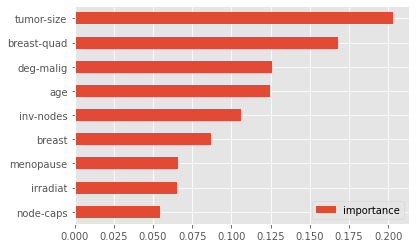

In [142]:
feature_importances.sort_values('importance', ascending=True).plot(kind='barh')

In [156]:
from sklearn.metrics import roc_auc_score, roc_curve

In [162]:
probs_rf = rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, probs_rf)

In [174]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='red', label=f'AUC (Random Forests) = {auc_rf:.2f}')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='baseline')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

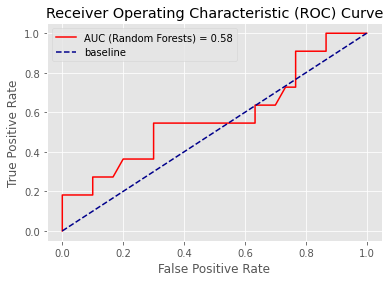

In [175]:
probs = rf.predict_proba(X_test)  
probs = probs[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, probs) 
plot_roc_curve(fpr, tpr)

In [120]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

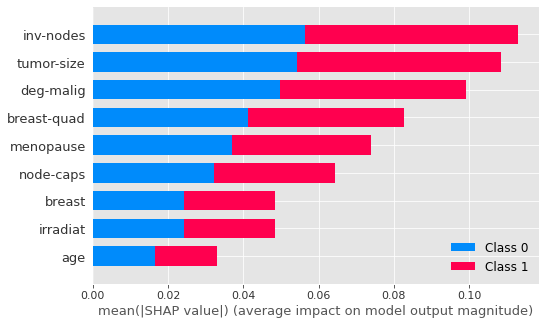

In [121]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

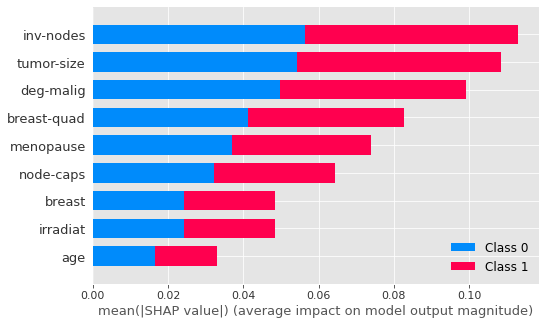

In [122]:
f = plt.figure()
shap.summary_plot(shap_values, X_test)
f.savefig("/summary_plot1.png", bbox_inches='tight', dpi=600)

In [211]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_sample(X_train, np.ravel(y_train))
X_test_res, y_test_res = sm.fit_sample(X_test, np.ravel(y_test))

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.


In [124]:

print("Before OverSampling, counts of Recurrent Class '1': ",y_train.value_counts()[0])
print("Before OverSampling, counts of No-Recurrent Class '0': \n", y_train.value_counts()[1])

Before OverSampling, counts of Recurrent Class '1':  121
Before OverSampling, counts of No-Recurrent Class '0': 
 39


In [125]:
print('After OverSampling, the shape of features_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of Output_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of Recurrent Class '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of Non-Recurrent Class '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of features_X: (242, 9)
After OverSampling, the shape of Output_y: (242,) 

After OverSampling, counts of Recurrent Class '1': 121
After OverSampling, counts of Non-Recurrent Class '0': 121


In [126]:
pipe_rf_oversampling = pipe_rf.fit(X_train_res, y_train_res)

In [127]:
pipe_rf_oversampling.score(X_test, y_test)

0.7317073170731707

In [128]:
cross_val_score(pipe_rf, X_train_res, y_train_res, cv=5, scoring='accuracy').mean()

0.8357142857142856

In [197]:
from xgboost.sklearn import XGBClassifier
from collections import  Counter
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

model = XGBClassifier(scale_pos_weight=3)

In [187]:
counter = Counter(y_train)

In [188]:

counter
estimate = counter[0]/counter[1]

print('Estimate: ', estimate)

Estimate:  3.1025641025641026


In [192]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

In [194]:
print('Mean ROC AUC: %.5f' % np.mean(scores))

Mean ROC AUC: 0.65232


In [195]:
...
# define grid
weights = [1, 3, 5, 10, 50, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)



In [200]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

grid_result = grid.fit(X_train, y_train)

In [201]:

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.689984 using {'scale_pos_weight': 1}
0.689984 (0.116815) with: {'scale_pos_weight': 1}
0.652324 (0.134904) with: {'scale_pos_weight': 3}
0.659268 (0.129099) with: {'scale_pos_weight': 5}
0.667067 (0.123359) with: {'scale_pos_weight': 10}
0.659028 (0.132871) with: {'scale_pos_weight': 50}
0.659188 (0.125890) with: {'scale_pos_weight': 99}
0.661939 (0.130861) with: {'scale_pos_weight': 100}
0.656624 (0.124697) with: {'scale_pos_weight': 1000}


In [202]:
xgb = XGBClassifier(scale_pos_weight=1)
scores1 = cross_val_score(xgb, X_train_res, y_train_res, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.5f' % np.mean(scores1))

Mean ROC AUC: 0.90919


In [228]:
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

result = grid.fit(X_train_res, y_train_res)

In [229]:
# report the best configuration
print("Best: %f using %s" % (result.best_score_, result.best_params_))
# report all configurations
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.909188 using {'scale_pos_weight': 1}
0.909188 (0.065264) with: {'scale_pos_weight': 1}
0.902422 (0.075116) with: {'scale_pos_weight': 3}
0.898789 (0.080007) with: {'scale_pos_weight': 5}
0.896118 (0.079212) with: {'scale_pos_weight': 10}
0.896457 (0.073352) with: {'scale_pos_weight': 50}
0.896795 (0.070242) with: {'scale_pos_weight': 99}
0.895121 (0.069139) with: {'scale_pos_weight': 100}
0.888221 (0.073465) with: {'scale_pos_weight': 1000}


In [212]:
xgb.fit(X_train_res, y_train_res)
xgb.predict(X_test_res)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [213]:
xgb.base_score

0.5

In [217]:
xgb.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

In [220]:
pipe_xgb = make_pipeline(StandardScaler(), xgb)

In [223]:
pipe_xgb.fit(X_train_res, y_train_res)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

In [230]:
pipe_xgb.score(X_test, y_test)

0.7804878048780488

In [231]:
pipe_xgb.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [233]:
scores2 = cross_val_score(rf, X_train_res, y_train_res, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.5f' % np.mean(scores2))

Mean ROC AUC: 0.91368


In [236]:
grid = {'n_estimators': [100, 200, 300, 400, 500], 'criterion': ['gini', 'entropy'], 'max_leaf_nodes': [int, None], 'bootstrap': [True, False] }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
search = GridSearchCV(rf, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# fit the search
rf_results = search.fit(X_train_res, y_train_res)

# summarize


In [237]:
print('The best estimator of the random forest model: ', rf_results.best_estimator_)
print()
print('-'*100)
print('The best index of the random forest model: ', rf_results.best_index_)
print()
print('-'*100)
print('The best parameter of the random forest model: ', rf_results.best_params_)
print()
print('-'*100)
print('The best score of the random forest model: ', rf_results.best_score_)


The best estimator of the random forest model:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

----------------------------------------------------------------------------------------------------
The best index of the random forest model:  16

----------------------------------------------------------------------------------------------------
The best parameter of the random forest model:  {'bootstrap': True, 'criterion': 'entropy', 'max_leaf_nodes': None, 'n_estimators': 200}

-------------

In [246]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train_res, y_train_res)
dt_pred = dt.predict(X_test_res)

In [239]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(dt, X_train_res, y_train_res, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))  

0.7920555555555556


In [240]:

# define grid
grid = {'splitter': ['random', 'best'], 'criterion': ['gini', 'entropy'], 'max_leaf_nodes': [int, None], 'max_features': ['auto', 'sqrt', 'log2']}

# define search
search = GridSearchCV(dt, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# fit the search
dt_results = search.fit(X_train_res, y_train_res)



In [241]:
print('The best estimator of the decision tree model: ', dt_results.best_estimator_)
print()
print('-'*100)
print('The best index of the decision tree model: ', dt_results.best_index_)
print()
print('-'*100)
print('The best parameter of the decision tree model: ', dt_results.best_params_)
print()
print('-'*100)
print('The best score of the decision tree model: ', dt_results.best_score_)

The best estimator of the decision tree model:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

----------------------------------------------------------------------------------------------------
The best index of the decision tree model:  7

----------------------------------------------------------------------------------------------------
The best parameter of the decision tree model:  {'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'splitter': 'best'}

----------------------------------------------------------------------------------------------------
The best score of the decision tr

In [242]:
from sklearn.tree import plot_tree


[Text(590.1923076923077, 475.65000000000003, 'inv-nodes <= 2.05\ngini = 0.5\nsamples = 242\nvalue = [121, 121]\nclass = no_recurrence'),
 Text(214.6153846153846, 339.75, 'tumor-size <= 14.5\ngini = 0.426\nsamples = 156\nvalue = [108, 48]\nclass = no_recurrence'),
 Text(107.3076923076923, 203.85000000000002, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]\nclass = no_recurrence'),
 Text(321.9230769230769, 203.85000000000002, 'menopause <= 0.802\ngini = 0.475\nsamples = 124\nvalue = [76, 48]\nclass = no_recurrence'),
 Text(214.6153846153846, 67.94999999999999, 'gini = 0.499\nsamples = 75\nvalue = [36, 39]\nclass = recurrence'),
 Text(429.2307692307692, 67.94999999999999, 'gini = 0.3\nsamples = 49\nvalue = [40, 9]\nclass = no_recurrence'),
 Text(965.7692307692307, 339.75, 'breast <= 0.989\ngini = 0.257\nsamples = 86\nvalue = [13, 73]\nclass = recurrence'),
 Text(751.1538461538462, 203.85000000000002, 'breast-quad <= 3.424\ngini = 0.094\nsamples = 61\nvalue = [3, 58]\nclass = recurrence'),
 Tex

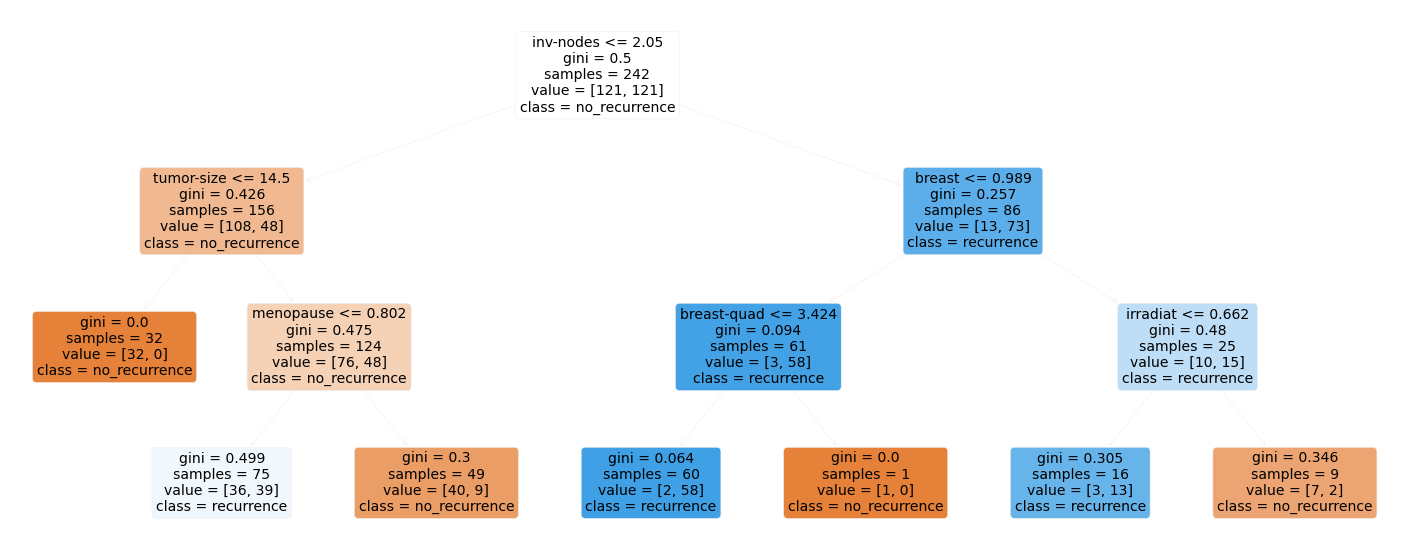

In [248]:
plt.figure(figsize=(25, 10))
class_names = ['no_recurrence', 'recurrence']
plot_tree(dt,feature_names=X.columns, class_names= class_names, filled=True, rounded=True, fontsize=14 )